# Exercise 2.3 - Eigenfaces (3.5pts)

<figure>
<a id="examples"><center><img src="imgs/eigenfaces.png" style="width:50%"/></center></a>
<figcaption align = "center"> Figure 1: Some examples of eigenfaces. </figcaption>
</figure>

In this assignment you will compute [eigenfaces](http://engr.case.edu/merat_francis/eecs490f04/References/Face%20Recognition/LD%20Face%20analysis.pdf) of the [Olivetti faces dataset](https://scikit-learn.org/stable/datasets/real_world.html#the-olivetti-faces-dataset). Note that the linked ressources are only here to provide additional background knowledge and you do not need to understand them in any detail to complete this assignment. In general, eigenfaces can be seen as a compressed version of the individual faces in the dataset from which the original faces can be reconstructed. You can find some examples in [Figure 1](#examples). For general datasets, this approach of finding compressed features is also known as Principal Components Analysis (PCA), which will be covered in detail in upcoming lectures. To complete this assignment, however, the material covered up to Chapter 3 is sufficient. 

In [1]:
import sys
assert sys.version_info >= (3, 6), "This notebook requires python version >= 3.6 to support type hints."

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple

In [3]:
def plot_faces(imgs: np.ndarray, n: int) -> None:
    """Plots the first n images from imgs
    args:
        imgs: a numpy array of shape (N, 64, 64) containing N 64x64 images
        n: number of images to plot
    """
    assert imgs.shape[0] >= n, f"imgs array must contain at least {n} images"
    assert imgs.ndim == 3, f"imgs array must be of shape (N, H, W)"
    assert imgs.shape[1:] == (64, 64), f"Images must be of dimension (64, 64) not {imgs.shape[1:]}. If you passed flattened images, reshape them first."
    fig, axes = plt.subplots(1, n)
    for i in range(n):
        axes[i].imshow(imgs[i])
        axes[i].set_axis_off()
    plt.show()

The faces are stored as a numpy array and are loaded by executing the cell below. Make sure to place the file `faces.npy` that comes with the assignment in the same folder as this notebook.

In [4]:
faces = np.load('faces.npy')
faces.shape

(400, 64, 64)

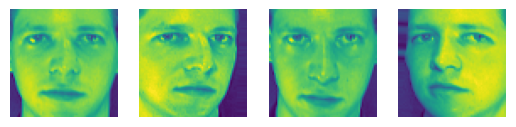

In [5]:
plot_faces(faces, 4)

## Exercise 2.3.1 - Preprocess (0.5pts)
First, calculate the average of all the face images in the dataset to find the mean face. Then, adjust each image in the dataset by subtracting this mean face from it, effectively centering the dataset. For reference, the mean face should look as in [Figure 2](#meanface). Lastly, flatten each image into a vector. After preprocessing, your dataset should contain 400 4096-dimensional vectors.

<figure>
<a id="examples"><center><img src="imgs/meanface.png" style="width:15%"/></center></a>
<figcaption align = "center"> Figure 2: Mean face. </figcaption>
</figure>

In [6]:
def preprocess(faces: np.ndarray) -> np.ndarray:
    """Reshapes each face image into a 1D vector and column-centers them to have mean 0."""  
    pass

## Exercise 2.3.2 - EVD (1pt)
Compute the covariance matrix of the preprocessed faces using the formula $\text{Var}[\boldsymbol{X}] = \frac{1}{m - 1} \boldsymbol{X}^T \boldsymbol{X}$, where $\boldsymbol{X} \in \mathbb{R}^{m\times n}$. Afterwards, find its eigenvectors ordered in descending order by their corresponding eigenvalues. You can use `sort_eigvectors` to do the sorting. Afterwards, plot the first four eigenfaces.

**Note:** If you use numpy, you will need to use `np.linalg.eigh` instead of `np.linalg.eig` to compute the eigendecomposition to avoid running into numerical issues. 

In [7]:
def sort_eigvectors(eigvalues: np.ndarray, eigvectors: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """Sorts eigenvectors according to their corresponding eigenvalues. The input is expected to be the result of np.linalg.eigh.""" 
    idx = eigvalues.argsort()[::-1]
    eigvalues = eigvalues[idx] 
    eigvectors = eigvectors[:, idx]
    return eigvalues, eigvectors

In [8]:
def eigenfaces_evd(face_vectors: np.ndarray) -> np.ndarray:
    pass

## Exercise 2.3.3 - SVD (0.5pt)
Eigenfaces can also be computed using a singular value decomposition of the data matrix. Complete `eigenfaces_svd` by computing a singular value decomposition and returning the right singular values of the data matrix. Again, plot the first four eigenfaces.

In [9]:
def eigenfaces_svd(face_vectors: np.ndarray) -> np.ndarray:
    pass

**Note**: The brightness values for some images might be inverted compared to the examples in [Figure 1](#examples) or those computed using the EVD. This is due to different algorithms used under the hood and you don't need to worry about it.

## Exercise 2.3.4 - Reconstruction (1pt)
Reconstruct the faces in the dataset with varying levels of accuracy. Use the SVD for this and vary the accuracy by including more or fewer singular values. You can do this by setting more or fewer singular values inside the diagonal matrix $\boldsymbol{D}$ to zero. Plot the first four faces in the dataset once using 25 singular values  and once using 200 singular values.

In [10]:
def reconstruct(faces: np.ndarray, num_singular_values: int) -> np.ndarray:
    pass

## Exercise 2.3.5 - Quiz (0.5pts)
1. Why are the results of exercise 2.3.2 and 2.3.3 the same?
2. (Optional) You may have noticed that the computation using the singular value decomposition was much faster than the eigenvalue decomposition.
   Why is this the case?